In [2]:
import keras
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import Sequential, load_model, model_from_json
from keras.layers import LSTM, Dense,Embedding, Dropout, GRU, Conv1D, MaxPooling1D, Flatten, TimeDistributed, BatchNormalization
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from keras.optimizers import *
from keras.callbacks import LearningRateScheduler
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
import os


Using TensorFlow backend.


In [17]:
path = 'train_keypoint_locations/'
dirs = os.listdir(path)

data = []
labels = []
num_img = []
for item in dirs:
    if os.path.isfile(path+item):
        #print(item)
        df = pd.read_csv(path+item, header = None)
        [m,n]=df.shape
        num_img.append(m)
        labels.append(df.iloc[:,-1])
        df = df.drop(df.iloc[:, n-2:n], axis = 1)
        print(df.shape)
        data.append(df)
        

(174, 36)
(192, 36)
(163, 36)
(194, 36)
(174, 36)
(194, 36)
(192, 36)
(194, 36)
(195, 36)
(197, 36)
(429, 36)
(236, 36)
(385, 36)
(395, 36)
(414, 36)
(204, 36)
(210, 36)
(204, 36)
(195, 36)
(202, 36)
(238, 36)
(245, 36)
(249, 36)
(255, 36)
(256, 36)
(248, 36)
(230, 36)
(233, 36)
(218, 36)
(220, 36)
(131, 36)
(131, 36)
(134, 36)
(127, 36)
(139, 36)
(117, 36)
(110, 36)
(121, 36)
(111, 36)
(123, 36)
(610, 36)
(470, 36)
(554, 36)
(318, 36)
(512, 36)
(67, 36)
(68, 36)
(64, 36)
(58, 36)
(60, 36)
(80, 36)
(95, 36)
(84, 36)
(89, 36)
(89, 36)
(136, 36)
(159, 36)
(161, 36)
(146, 36)
(148, 36)
(188, 36)
(193, 36)
(182, 36)
(191, 36)
(188, 36)
(470, 36)
(474, 36)
(509, 36)
(473, 36)
(519, 36)
(214, 36)
(251, 36)
(243, 36)
(245, 36)
(247, 36)
(228, 36)
(226, 36)
(227, 36)
(219, 36)
(218, 36)
(218, 36)
(229, 36)
(252, 36)
(257, 36)
(258, 36)
(123, 36)
(130, 36)
(131, 36)
(122, 36)
(115, 36)
(68, 36)
(80, 36)
(73, 36)
(77, 36)
(75, 36)
(357, 36)
(584, 36)
(526, 36)
(524, 36)
(555, 36)
(76, 36)
(75, 3

In [18]:
x_all = pd.concat(data).values
Y = pd.concat(labels).values
X = x_all.astype('float32') / np.float32(255)
X=X.reshape(X.shape[0], 1,  X.shape[1])

Y = keras.utils.to_categorical(Y, num_classes=11)
print(X.shape)
print(Y.shape)

(76678, 1, 36)
(76678, 11)


In [63]:
def make_model( nb_hidden_1):

#     nb_input = 4096
    dropout=0.5
    option = 1
    nb_output = 11
    if option==1:
        nb_hidden_1 = nb_hidden_1
        nb_hidden_2 = nb_hidden_1
    elif option==2:
        nb_hidden_1 = nb_hidden_1
        nb_hidden_2 = nb_hidden_1*2
    elif option==3:
        nb_hidden_1 = nb_hidden_1
        nb_hidden_2 = int(nb_hidden_1/2)
        
#     print("---------------------------------------------------------------------")
#     print("No. of units in hidden layer1: {}".format(nb_hidden_1))
#     print("No. of units in hidden layer2: {}".format(nb_hidden_2))
#     print("Learning rate: {}".format(lr))
#     print("Dropout: {}".format(dropout))
    
    
    model = Sequential()

    model.add(LSTM(units= nb_hidden_1,return_sequences= True, activation='relu', input_shape=(X.shape[1], X.shape[2])))
    model.add(Dropout(dropout))
#     model.add(LSTM(units= nb_hidden_2, return_sequences= True, activation='elu'))
#     model.add(Dropout(dropout))
    model.add(LSTM(units= nb_hidden_2, activation='relu'))
    model.add(Dropout(dropout))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(16, activation='relu'))
    model.add(Dropout(dropout))
 #   model.add(LSTM(16, activation= 'relu'))
    
    model.add(Dense(nb_output, activation='softmax'))
#     opt = adam(lr=0.001)
    opt = keras.optimizers.Adadelta(lr=1.0, rho=0.95, epsilon=None, decay=0.0)

#     opt = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
    model.compile(loss = 'categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
    return model
model = make_model(nb_hidden_1=64)
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_32 (LSTM)               (None, 1, 64)             25856     
_________________________________________________________________
dropout_40 (Dropout)         (None, 1, 64)             0         
_________________________________________________________________
lstm_33 (LSTM)               (None, 64)                33024     
_________________________________________________________________
dropout_41 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_36 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_37 (Dense)             (None, 16)                528       
_________________________________________________________________
dropout_42 (Dropout)         (None, 16)                0         
__________

In [64]:
# #params (dimensions)
# #GridSearch params
# lr = [0.01, 0.1, 1]
# model = KerasClassifier(make_model, batch_size=256)
# nb_hidden_1=[16,32]
                    
# validator = GridSearchCV(model,cv=5,
#                          param_grid={'epochs': [20, 50, 100],
#                                      'nb_hidden_1':nb_hidden_1, 'lr':lr},
#                          scoring='accuracy')

# # history = 
# validator.fit(X_train, Y_train)
# # print(validator._params_)
# print(validator.best_params_)
# print(validator.best_estimator_)
# print(validator.best_score_)
# print(validator.keys())
# print("---------------------------------------------------")

Epoch 1/20
76678/76678 [==============================] - 20s 265us/step - loss: 2.1715 - acc: 0.2143
Epoch 2/20
76678/76678 [==============================] - 12s 162us/step - loss: 1.8617 - acc: 0.2937
Epoch 3/20
76678/76678 [==============================] - 12s 158us/step - loss: 1.7445 - acc: 0.3280
Epoch 4/20
76678/76678 [==============================] - 12s 158us/step - loss: 1.6905 - acc: 0.3491
Epoch 5/20
76678/76678 [==============================] - 12s 159us/step - loss: 1.6470 - acc: 0.3705
Epoch 6/20
76678/76678 [==============================] - 13s 163us/step - loss: 1.6077 - acc: 0.3876
Epoch 7/20
76678/76678 [==============================] - 12s 160us/step - loss: 1.5765 - acc: 0.4045
Epoch 8/20
76678/76678 [==============================] - 13s 174us/step - loss: 1.5550 - acc: 0.4111
Epoch 9/20
76678/76678 [==============================] - 13s 165us/step - loss: 1.5368 - acc: 0.4196
Epoch 10/20
76678/76678 [==============================] - 13s 165us/step - loss: 

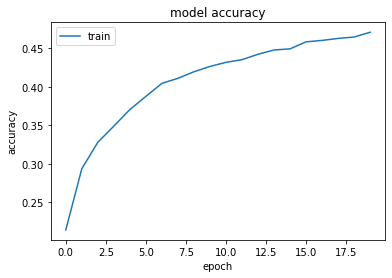

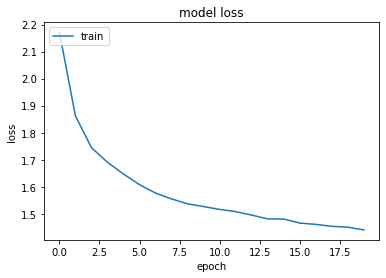

In [65]:
history = model.fit(X, Y,epochs = 20, batch_size=64)
plt.plot(history.history['acc'])
# plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [37]:
path = 'test_keypoint_locations/'
dirs = os.listdir(path)

data = []
labels = []
num_img = []
for item in dirs:
    if os.path.isfile(path+item):
        #print(item)
        df = pd.read_csv(path+item, header = None)
        [m,n]=df.shape
        num_img.append(m)
        labels.append(df.iloc[:,-1])
        df = df.drop(df.iloc[:, n-2:n], axis = 1)
        print(df.shape)
        data.append(df)
x_all = pd.concat(data).values
Y_test = pd.concat(labels).values
X_test = x_all.astype('float32') / np.float32(255)
X_test=X_test.reshape(X_test.shape[0], 1,  X_test.shape[1])

Y_test = keras.utils.to_categorical(Y_test, num_classes=11)
print(X_test.shape)
print(Y_test.shape)

(128, 36)
(132, 36)
(121, 36)
(139, 36)
(127, 36)
(201, 36)
(201, 36)
(202, 36)
(199, 36)
(197, 36)
(409, 36)
(384, 36)
(390, 36)
(383, 36)
(394, 36)
(170, 36)
(182, 36)
(174, 36)
(178, 36)
(186, 36)
(161, 36)
(170, 36)
(175, 36)
(178, 36)
(188, 36)
(180, 36)
(188, 36)
(195, 36)
(193, 36)
(192, 36)
(110, 36)
(109, 36)
(136, 36)
(109, 36)
(108, 36)
(73, 36)
(78, 36)
(62, 36)
(66, 36)
(79, 36)
(366, 36)
(348, 36)
(328, 36)
(347, 36)
(351, 36)
(82, 36)
(67, 36)
(74, 36)
(72, 36)
(68, 36)
(48, 36)
(48, 36)
(48, 36)
(65, 36)
(64, 36)
(116, 36)
(107, 36)
(110, 36)
(111, 36)
(109, 36)
(204, 36)
(206, 36)
(198, 36)
(201, 36)
(204, 36)
(907, 36)
(792, 36)
(767, 36)
(734, 36)
(736, 36)
(302, 36)
(314, 36)
(317, 36)
(320, 36)
(333, 36)
(451, 36)
(464, 36)
(502, 36)
(481, 36)
(487, 36)
(444, 36)
(473, 36)
(461, 36)
(524, 36)
(447, 36)
(105, 36)
(105, 36)
(105, 36)
(113, 36)
(120, 36)
(133, 36)
(125, 36)
(127, 36)
(117, 36)
(119, 36)
(549, 36)
(800, 36)
(863, 36)
(814, 36)
(852, 36)
(131, 36)
(142,

In [66]:
scores = model.evaluate(X_test, Y_test, batch_size=64, verbose=1)
print('\nTest result: %.3f loss: %.3f' % (scores[1]*100,scores[0]))

63576/63576 [==============================] - 5s 81us/step

Test result: 50.612 loss: 1.622
